In [1]:
# support vector machine

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [3]:
df=pd.read_csv("Pharma_Industry.csv")

In [4]:
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [5]:
#checking null values
df.isnull().sum()

,0
Drug Dosage (mg),0
Systolic Blood Pressure (mmHg),0
Heart Rate (BPM),0
Liver Toxicity Index (U/L),0
Blood Glucose Level (mg/dL),0
Drug Response,0


In [6]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

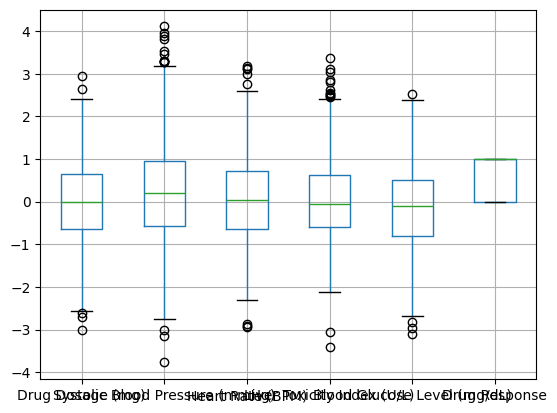

In [7]:
#outliers
df.boxplot()
plt.show()

In [8]:
#outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

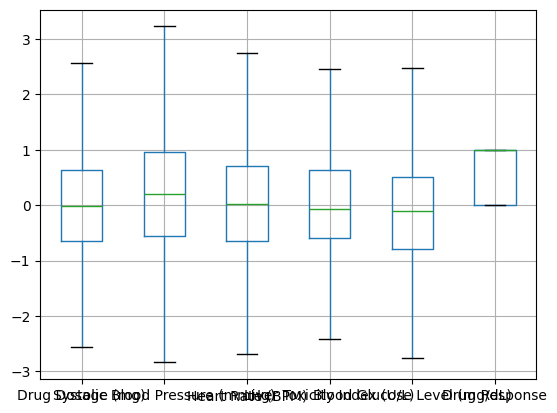

In [9]:
df.boxplot()
plt.show()

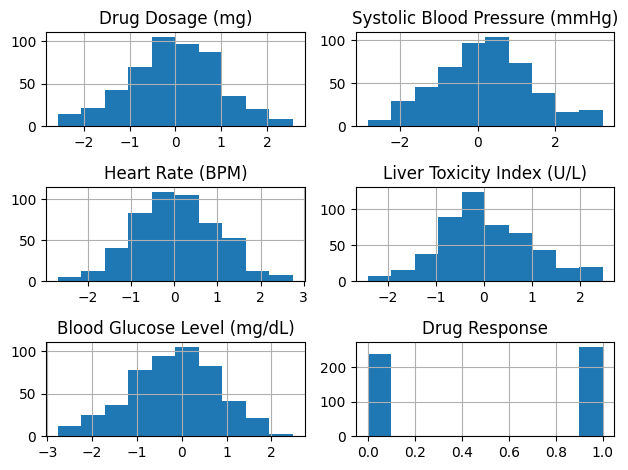

In [10]:
#histogram
df.hist()
plt.tight_layout()
plt.show()

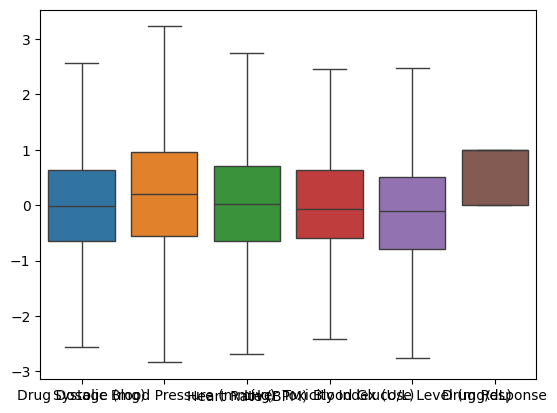

In [11]:
sns.boxplot(data=df)
plt.show()

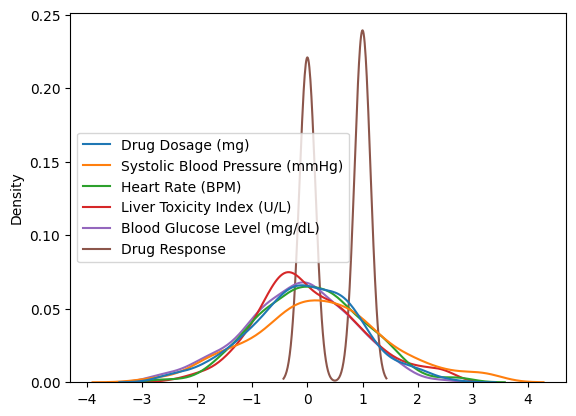

In [12]:
sns.kdeplot(data=df)
plt.show()

In [13]:
corr=df.corr()
corr

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
Drug Dosage (mg),1.000000,0.087760,0.040512,0.128059,0.010070,0.043340
Systolic Blood Pressure (mmHg),0.087760,1.000000,-0.041466,0.273864,0.041263,0.308012
Heart Rate (BPM),0.040512,-0.041466,1.000000,0.004618,0.051423,-0.011235
Liver Toxicity Index (U/L),0.128059,0.273864,0.004618,1.000000,0.229714,0.437289
Blood Glucose Level (mg/dL),0.010070,0.041263,0.051423,0.229714,1.000000,0.169445
Drug Response,0.043340,0.308012,-0.011235,0.437289,0.169445,1.000000


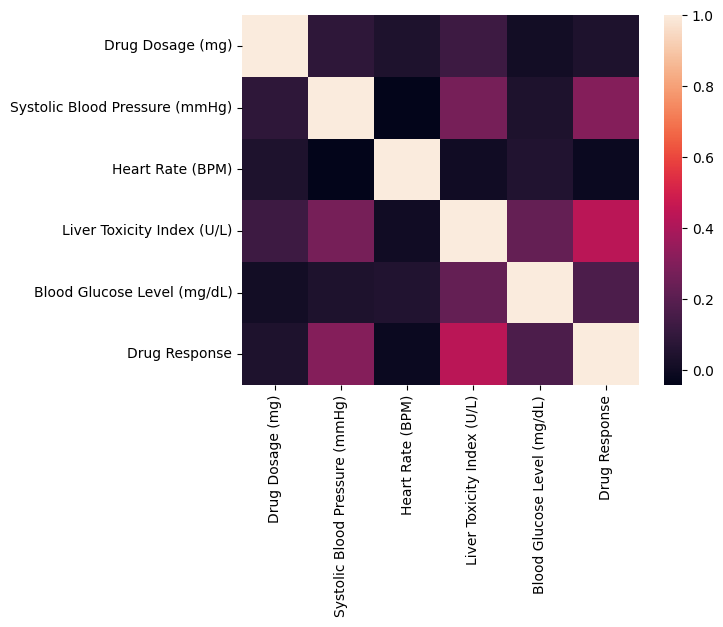

In [14]:
sns.heatmap(corr)
plt.show()

In [15]:
#from the above heat map every feature has low correlation so need to drop any feature.

In [16]:
#data preprocessing

In [17]:
df.dtypes

,0
Drug Dosage (mg),float64
Systolic Blood Pressure (mmHg),float64
Heart Rate (BPM),float64
Liver Toxicity Index (U/L),float64
Blood Glucose Level (mg/dL),float64
Drug Response,int64


In [18]:
#drug response is ony one categorical which is already encoded.

In [19]:
target=df["Drug Response"]
features=df.drop(columns=["Drug Response"])

In [20]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100,stratify=target)

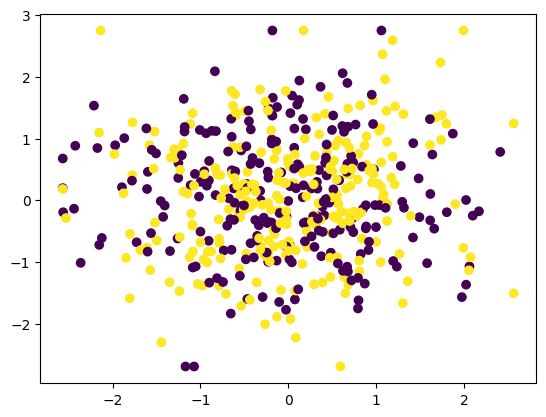

In [21]:
### scatter plot
plt.scatter(x=df['Drug Dosage (mg)'],y=df['Heart Rate (BPM)'],c=df['Drug Response'])
plt.show()

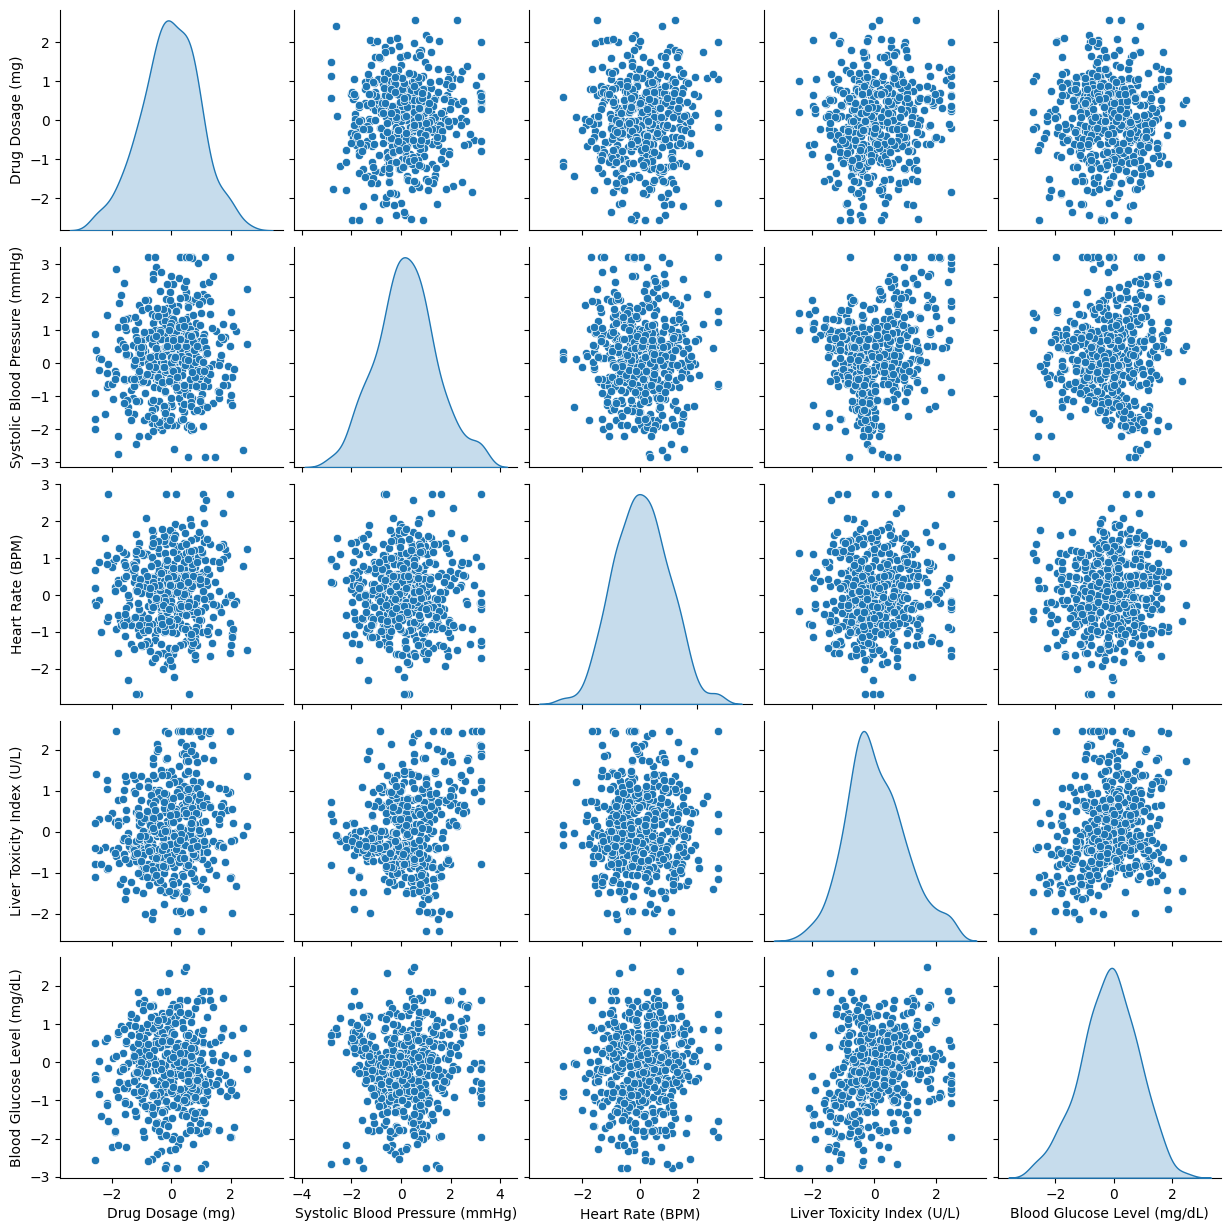

In [22]:
#pairplot
sns.pairplot(data=features,diag_kind="kde")
plt.show()

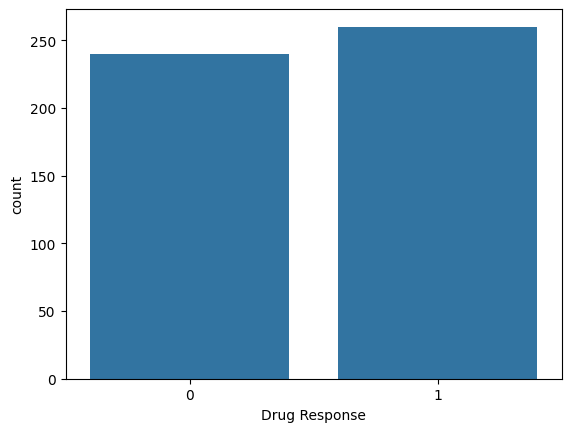

In [23]:
sns.countplot(data=df[['Drug Response']],x='Drug Response')
plt.show()

In [24]:
#svm implementation


In [25]:
svc=SVC(C=1,kernel='linear')

In [26]:
svc.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [28]:
y_pred_train=svc.predict(x_train)
accuracy_score(y_pred_train,y_train)

0.728

In [29]:
y_pred_test=svc.predict(x_test)
accuracy_score(y_pred_test,y_test)

0.736

In [30]:
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        57
           1       0.77      0.74      0.75        68

    accuracy                           0.74       125
   macro avg       0.73      0.74      0.73       125
weighted avg       0.74      0.74      0.74       125



In [31]:
#visualization of classification results on testing data

In [32]:
conf=confusion_matrix(y_pred_test,y_test)

In [33]:
conf

array([[42, 15],
       [18, 50]])

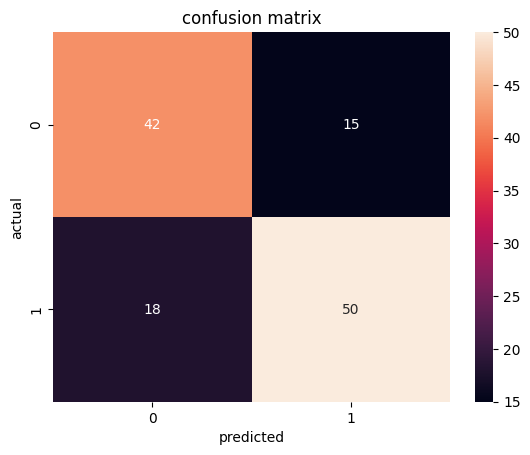

In [34]:
sns.heatmap(conf,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

In [35]:
#Parameter Tuning and Optimization

In [42]:
parameter={"kernel":['linear','rbf','poly','sigmoid'],'C':[0.1,1,10,100],'gamma':[0.1,0.2,0.5,1]}

In [43]:
grid_search=GridSearchCV(svc,parameter,cv=5)

In [44]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(C=1, kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.2, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [45]:
grid_search.best_params_

{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

In [48]:
svc=SVC(C=1,kernel='rbf',gamma=0.2)

In [49]:
svc.fit(x_train,y_train)

SVC(C=1, gamma=0.2)

In [50]:
opti_pred=svc.predict(x_train)
accuracy_score(opti_pred,y_train)

0.792

In [51]:
# the best performance is given by rbf kernel with a gamma value of 0.2 and C=1

In [56]:
#comparison and analysis

In [ ]:
#comparison

In [53]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
C_values = [0.1, 1, 10,100]
Gamma=[0.1,0.2,0.5,1]
best_acc = 0
best_params = {}
for kernel in kernels:
    for C in C_values:
        for G in Gamma:
            model = SVC(kernel=kernel, C=C, random_state=42)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            acc = accuracy_score(y_test, y_pred)
            print(f"Kernel: {kernel}, C: {C},Gamma:{G}  Accuracy: {acc:.4f}")
            if acc > best_acc:
                best_acc = acc
                best_params = {'kernel': kernel, 'C': C}

print("\nBest Accuracy:", best_acc)
print("Best Parameters:", best_params)

Kernel: linear, C: 0.1,Gamma:0.1  Accuracy: 0.7360
Kernel: linear, C: 0.1,Gamma:0.2  Accuracy: 0.7360
Kernel: linear, C: 0.1,Gamma:0.5  Accuracy: 0.7360
Kernel: linear, C: 0.1,Gamma:1  Accuracy: 0.7360
Kernel: linear, C: 1,Gamma:0.1  Accuracy: 0.7360
Kernel: linear, C: 1,Gamma:0.2  Accuracy: 0.7360
Kernel: linear, C: 1,Gamma:0.5  Accuracy: 0.7360
Kernel: linear, C: 1,Gamma:1  Accuracy: 0.7360
Kernel: linear, C: 10,Gamma:0.1  Accuracy: 0.7360
Kernel: linear, C: 10,Gamma:0.2  Accuracy: 0.7360
Kernel: linear, C: 10,Gamma:0.5  Accuracy: 0.7360
Kernel: linear, C: 10,Gamma:1  Accuracy: 0.7360
Kernel: linear, C: 100,Gamma:0.1  Accuracy: 0.7360
Kernel: linear, C: 100,Gamma:0.2  Accuracy: 0.7360
Kernel: linear, C: 100,Gamma:0.5  Accuracy: 0.7360
Kernel: linear, C: 100,Gamma:1  Accuracy: 0.7360
Kernel: rbf, C: 0.1,Gamma:0.1  Accuracy: 0.7600
Kernel: rbf, C: 0.1,Gamma:0.2  Accuracy: 0.7600
Kernel: rbf, C: 0.1,Gamma:0.5  Accuracy: 0.7600
Kernel: rbf, C: 0.1,Gamma:1  Accuracy: 0.7600
Kernel: rbf, C

In [54]:
#rbf kernel gives the highest accuracy(0.79) by linear with an accuracy of (0.73). Poly kernel comes behind it with an accuracy of (0.70) and the least accuracy is given by the sigmoid kernel which behaves inconsistently

In [ ]:
#analysis

Based on EDA and confusion matrix, there is strong classification for Positive cases(class 1), Good True Negative Rate (Class 0) are the strengths. The weakness is lower recall for positive cases(class 1)



In [57]:
#practical implications of SVM in real-world classification tasks.

Text classification, Bioinformatics, Image Recognition, Medical Diagnosis,scientific research. etc can be used in realworld
